In [1]:
"import numpy as np", 
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def std_col_name(name):
	name = name.strip()
	name = re.sub(r"\s+", "_", name)
	name = re.sub(r"[^$/\w]", "", name)
	return name.lower()

std_col_name("  PATRIMONIO /#$&% ATIVOS  ")

'patrimonio_/$_ativos'

- [ x ] Dar pontos positivos ou negativos para cada coluna da empresa
- [ x ] Rankear ações pela melhor pontuação geral
- [ ] Rankear FIIs da mesm forma
- [ ] Avaliar historicamente se investir ns top 15 desse ranking traz bons resultados
- [ ] Adicionar metricas historicas (evolucao de preco, distribuicao de dividendos, etc)
- [ ] Adicionar modelo Black & Scholes
- [ ] Adicionar fontes de dados independentes do Status Invest
- [ ] Adicionar metadados (setor da acao, vantagem competiiva, gestao boa, etc)
- [ ] !!!! Adicionar método que faz top 20 de cada coluna e dá 1 ponto pra cada carcterística TOP


In [3]:
br_stocks = pd.read_csv("acoes_brasil.csv", sep=";", decimal=",", thousands='.') #, index_col="TICKER") #.fillna(0)
stocks_col_names = [std_col_name(name) for name in br_stocks.columns]
br_stocks.columns = stocks_col_names

br_stocks[["dy"]] = br_stocks[["dy"]].fillna(0)

print(br_stocks.columns)
print(br_stocks.dtypes)
br_stocks.head()

Index(['ticker', 'preco', 'dy', 'p/l', 'p/vp', 'p/ativos', 'margem_bruta',
       'margem_ebit', 'marg_liquida', 'p/ebit', 'ev/ebit',
       'divida_liquida_/_ebit', 'div_liq_/_patri', 'psr', 'p/cap_giro',
       'p_at_cir_liq', 'liq_corrente', 'roe', 'roa', 'roic',
       'patrimonio_/_ativos', 'passivos_/_ativos', 'giro_ativos',
       'cagr_receitas_5_anos', 'cagr_lucros_5_anos', 'liquidez_media_diaria',
       'vpa', 'lpa', 'peg_ratio', 'valor_de_mercado'],
      dtype='object')
ticker                    object
preco                    float64
dy                       float64
p/l                      float64
p/vp                     float64
p/ativos                 float64
margem_bruta             float64
margem_ebit              float64
marg_liquida             float64
p/ebit                   float64
ev/ebit                  float64
divida_liquida_/_ebit    float64
div_liq_/_patri          float64
psr                      float64
p/cap_giro               float64
p_at_cir_liq     

,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,patrimonio_/_ativos,passivos_/_ativos,giro_ativos,cagr_receitas_5_anos,cagr_lucros_5_anos,liquidez_media_diaria,vpa,lpa,peg_ratio,valor_de_mercado
0,AALR3,10.46,0.00,-4.70,1.22,0.45,30.10,1.60,-22.81,66.88,...,0.37,0.62,0.42,0.13,NaN,9.274967e+05,8.58,-2.22,-0.05,1.237343e+09
1,ABCB4,21.97,5.49,6.29,0.87,0.09,25.85,20.99,15.79,4.73,...,0.10,0.90,0.09,18.70,13.07,1.149103e+07,25.31,3.49,1.30,4.967200e+09
2,ABEV3,13.41,5.68,14.01,2.34,1.53,50.30,22.59,18.29,11.34,...,0.65,0.34,0.60,10.72,15.72,3.162055e+08,5.73,0.96,0.93,2.112589e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,NaN,NaN,NaN,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,0.86,0.00,-6.02,0.81,0.17,12.62,9.03,-3.39,2.26,...,0.21,0.79,0.84,NaN,NaN,3.706991e+06,1.06,-0.14,-0.03,6.589436e+08


In [4]:
def percentage_str_to_float(x):
	# print("el: '", x, "'")
	x = re.sub(r"^\s*$", "N/A", x)
	x = x.strip("%").replace(",", ".")
	if x == "N/A":
		return None
	return float(x) / 100

converters = {}
percentage_cols = ["DIVIDEND YIELD", "DY (12M) ACUMULADO", "DY (12M) MÉDIA", "VARIAÇÃO PREÇO", "DY PATRIMONIAL", "VARIAÇÃO PATRIMONIAL"]
for col in percentage_cols:
	converters[col] = percentage_str_to_float
	# print(col, fiis_df[col].dtype)
	# fiis_df[col] = fiis_df[col].apply(percentage_str_to_float)

fiis_df = pd.read_csv("fiis.csv", sep=",", decimal=",", thousands=".", converters=converters)

fiis_col_names = [std_col_name(name) for name in fiis_df.columns]
fiis_df.columns = fiis_col_names
fiis_df.rename(columns={"dividend_yield": "dy"}, inplace = True)
br_stocks[["dy"]] = br_stocks[["dy"]].fillna(0)

print(fiis_df.columns)
print(fiis_df.dtypes)
fiis_df.head()

Index(['ticker', 'setor', 'liquidez_diária_r$', 'p/vp', 'dy',
       'dy_12m_acumulado', 'dy_12m_média', 'variação_preço',
       'patrimônio_líquido', 'p/vpa', 'dy_patrimonial', 'variação_patrimonial',
       'quant_ativos', 'num_cotistas'],
      dtype='object')
ticker                   object
setor                    object
liquidez_diária_r$      float64
p/vp                    float64
dy                      float64
dy_12m_acumulado        float64
dy_12m_média            float64
variação_preço          float64
patrimônio_líquido      float64
p/vpa                   float64
dy_patrimonial          float64
variação_patrimonial    float64
quant_ativos            float64
num_cotistas            float64
dtype: object


,ticker,setor,liquidez_diária_r$,p/vp,dy,dy_12m_acumulado,dy_12m_média,variação_preço,patrimônio_líquido,p/vpa,dy_patrimonial,variação_patrimonial,quant_ativos,num_cotistas
0,AAZQ11,INDEFINIDO,658092.68,0.96,0.0131,0.1341,0.0149,-0.0245,2.273157e+08,0.96,0.0127,0.0000,0.0,19556.0
1,ABCP11,SHOPPINGS,43186.82,0.75,0.0087,0.0914,0.0076,0.0286,4.324652e+08,0.75,0.0065,0.0002,1.0,17587.0
2,AFHI11,PAPÉIS,1179377.89,1.01,0.0107,0.1304,0.0109,0.0022,3.178651e+08,1.01,0.0110,0.0012,0.0,25035.0
3,AGRX11,OUTROS,233347.32,NaN,0.0138,0.1656,0.0138,0.0150,NaN,NaN,NaN,NaN,0.0,0.0
4,AIEC11,LAJES CORPORATIVAS,623349.32,0.59,0.0132,0.1392,0.0116,-0.1216,4.578679e+08,0.59,0.0080,0.0149,2.0,15900.0


In [5]:
points_df = pd.DataFrame()

feature_to_green_flag_filter = {
	"p/l": {"min_val": 3, "max_val": 20},
	"dy": {"min_val": 5, "max_val": 20},
	"p/vp": {"min_val": 0.5, "max_val": 3},
	"margem_bruta": {"min_val": 5, "max_val": 100},
	"marg_liquida": {"min_val": 5, "max_val": 100},
	"roa": {"min_val": 5, "max_val": 100},
	"roe": {"min_val": 5, "max_val": 100},
	"roic": {"min_val": 5, "max_val": 100},
}

filtered_br_stocks = br_stocks
for feature_name, filter_info in feature_to_green_flag_filter.items():
	# step 1
	min_val = filter_info["min_val"]
	min_filter = (filtered_br_stocks[feature_name] > min_val)

	filtered_step_1 = filtered_br_stocks[min_filter]

	# step 2
	max_val = filter_info["max_val"]
	max_filter = (filtered_step_1[feature_name] < max_val)

	filtered_step_2 = filtered_step_1[max_filter]

	# end
	filtered_br_stocks = filtered_step_2

filtered_br_stocks.head()

,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,patrimonio_/_ativos,passivos_/_ativos,giro_ativos,cagr_receitas_5_anos,cagr_lucros_5_anos,liquidez_media_diaria,vpa,lpa,peg_ratio,valor_de_mercado
2,ABEV3,13.41,5.68,14.01,2.34,1.53,50.30,22.59,18.29,11.34,...,0.65,0.34,0.60,10.72,15.72,3.162055e+08,5.73,0.96,0.93,2.112589e+11
7,AGRO3,24.23,13.26,9.70,1.13,0.71,30.65,20.17,20.86,10.03,...,0.63,0.37,0.35,27.22,15.22,1.713373e+07,21.40,2.50,-0.22,2.488020e+09
133,CEBR3,14.90,17.80,5.51,1.03,0.73,42.78,84.57,67.30,4.39,...,0.71,0.11,0.20,-34.71,8.36,1.614987e+05,14.50,2.70,-18.67,1.131878e+09
134,CEBR5,14.56,18.21,5.39,1.00,0.72,42.78,84.57,67.30,4.29,...,0.71,0.11,0.20,-34.71,8.36,7.249531e+04,14.50,2.70,-18.24,1.131878e+09
135,CEBR6,16.50,17.68,6.11,1.14,0.81,42.78,84.57,67.30,4.86,...,0.71,0.11,0.20,-34.71,8.36,2.866735e+05,14.50,2.70,-20.67,1.131878e+09


In [6]:
def generate_point_col(stock_df, col_name): #, min_val, max_val):
	col_series = stock_df[col_name]

	# mean_val = col_series.mean()
	# std_dev = col_series.std()
	median_val = col_series.median()
	first_quarter = col_series.quantile(0.25)
	third_quarter = col_series.quantile(0.75)

	quarter_dist = third_quarter - first_quarter

	std_foo = (lambda x : abs(x[col_name] - median_val) / quarter_dist)
	ascending_std_foo = (lambda x : -std_foo(x))

	std_vals_series = stock_df.apply(ascending_std_foo, axis=1)
	lowest_val = std_vals_series.min()

	def calculate_points(x):
		standardized_val = std_foo(x)

		is_low_outlier = standardized_val <= first_quarter - 1.5 * quarter_dist
		is_high_outlier = standardized_val >= third_quarter + 1.5 * quarter_dist
		if is_low_outlier or is_high_outlier:
			standardized_val = -lowest_val # crazy negative ops, dont ask why

		return -standardized_val

	point_col_name = "generic_point_" + col_name

	col_df = col_series.to_frame()
	col_df[point_col_name] = col_df.apply(calculate_points, axis=1)
	col_df["ticker"] = stock_df["ticker"]

	return col_df[[point_col_name]]  # [["ticker", point_col_name]]

	# filtered_df = col_df[ (col_df > min_val) & (col_df < max_val) ].sort_values(by=col_name).head(50)
	# top_tickers = set(filtered_df["ticker"].unique())
	# print(top_tickers)
	
	# return col_df.apply(lambda x : 2 if x["ticker"] in top_tickers else 0, axis=1)


In [7]:
def generate_point_col_with_rank(stock_df, feature_name, filter_dict, red_flag_filters):
	# col_series = stock_df[col_name]

	# feature_name = filter_dict[0]
	min_val = filter_dict["min_val"]
	max_val = filter_dict["max_val"]
	the_bigger_the_better = filter_dict["the_bigger_the_better"]

	lower_tolerable_limit = red_flag_filters["lower_tolerable_limit"]
	upper_tolerable_limit = red_flag_filters["upper_tolerable_limit"]
	# the_bigger_the_better_red_flag = red_flag_filters["the_bigger_the_better"]
	
	should_order_ascending = not the_bigger_the_better

	# green points
	filters_green_flag = ((stock_df[feature_name] >= min_val) & (stock_df[feature_name] <= max_val))
	filtered_green_stock_df = stock_df[filters_green_flag].sort_values(by=feature_name, ascending=should_order_ascending).head(25)
	filtered_green_flag_stock_names = set(filtered_green_stock_df["ticker"])

	calculate_green_points = (lambda x : 1 if x["ticker"] in filtered_green_flag_stock_names else 0)
	green_point_col_name = "green_point_" + feature_name
	stock_df[green_point_col_name] = stock_df.apply(calculate_green_points, axis=1)

	# red points
	filters_red_flag = ((stock_df[feature_name] > upper_tolerable_limit) | (stock_df[feature_name] < lower_tolerable_limit))
	filtered_red_stock_df = stock_df[filters_red_flag]
	filtered_red_flag_stock_names = set(filtered_red_stock_df["ticker"])

	calculate_red_points = (lambda x : -1 if x["ticker"] in filtered_red_flag_stock_names else 0)
	red_point_col_name = "red_point_" + feature_name
	stock_df[red_point_col_name] = stock_df.apply(calculate_red_points, axis=1)


	return stock_df[[green_point_col_name, red_point_col_name]]


In [8]:
filter_green_flag_tuples = (
	("p/l", 3, 20, False),
	("dy", 0.05, 0.2, True),
	("p/vp", 0.5, 3, False),
	("margem_bruta", 50, 100, True),
	("marg_liquida", 5, 100, True),
	("margem_ebit", 20, 100, True),
	("roa", 5, 100, True),
	("roe", 5, 100, True),
	("roic", 5, 100, True),
	("liquidez_diária_r$", 10 ** 5, 10 ** 12, True),
	("dy_12m_acumulado", 0.05, 0.2, True),
	# ("dy_12m_média", 5 / 12, 20 / 12, True),
	("quant_ativos", 4, 1000, True),
	("num_cotistas", 1000, 10 ** 9, True),
	("num_cotistas", 1000, 10 ** 9, True)
)

# p/ativos                 float64
# margem_ebit              float64
# p/ebit                   float64
# ev/ebit                  float64
# divida_liquida_/_ebit    float64
# div_liq_/_patri          float64
# psr                      float64
# p/cap_giro               float64
# p_at_cir_liq             float64
# liq_corrente             float64
# patrimonio_/_ativos      float64
# passivos_/_ativos        float64
# giro_ativos              float64
# cagr_receitas_5_anos     float64
# cagr_lucros_5_anos       float64
# liquidez_media_diaria    float64
# vpa                      float64
# lpa                      float64
# peg_ratio                float64
# valor_de_mercado         float64

feature_to_green_flag_filter = {}

for filter_tuple in filter_green_flag_tuples:
	feature_name, min_val, max_val, the_bigger_the_better = filter_tuple

	feature_to_green_flag_filter[feature_name] = {
		"min_val": min_val,
		"max_val": max_val,
		"the_bigger_the_better": the_bigger_the_better
	}

In [9]:
filter_red_flag_tuples = (
	("p/l", 1, 30, False),
	("dy", -0.001, 0.25, True),
	("p/vp", 0.4, 1.5, False), # just for fiis
	("margem_bruta", 49, 101, True),
	("marg_liquida", 4, 101, True),
	("margem_ebit", 19, 101, True),
	("roa", 4, 101, True),
	("roe", 4, 101, True),
	("roic", 4, 101, True),
	("liquidez_diária_r$", 5 * 10 ** 4, 10 ** 13, True),
	("dy_12m_acumulado", 0.04, 0.21, True),
	("dy_12m_média", 0.04 / 12, 0.21 / 12, True), # redundant
	("quant_ativos", 0, 10 ** 10, True),
	("num_cotistas", 999, 10 ** 10, True)
)

feature_to_red_flag_filter = {}

for filter_tuple in filter_red_flag_tuples:
	feature_name, lower_tolerable_limit, upper_tolerable_limit, the_bigger_the_better = filter_tuple

	feature_to_red_flag_filter[feature_name] = {
		"lower_tolerable_limit": lower_tolerable_limit,
		"upper_tolerable_limit": upper_tolerable_limit,
		"the_bigger_the_better": the_bigger_the_better
	}

In [10]:
points_df = pd.DataFrame()

br_stocks_col_names = set(br_stocks.columns)
feature_names_that_have_green_filter = set(feature_to_green_flag_filter.keys())
feature_names_that_have_red_filter = set(feature_to_red_flag_filter.keys())

filtered_br_stocks = br_stocks
for feature_name, filter_info in feature_to_green_flag_filter.items():
	if feature_name not in br_stocks_col_names or feature_name not in feature_names_that_have_green_filter:
		continue

	# step 1
	min_val = filter_info["min_val"]
	min_filter = (filtered_br_stocks[feature_name] > min_val)

	filtered_step_1 = filtered_br_stocks[min_filter]

	# step 2
	max_val = filter_info["max_val"]
	max_filter = (filtered_step_1[feature_name] < max_val)

	filtered_step_2 = filtered_step_1[max_filter]

	# end
	filtered_br_stocks = filtered_step_2

filtered_br_stocks.head(5)

,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,patrimonio_/_ativos,passivos_/_ativos,giro_ativos,cagr_receitas_5_anos,cagr_lucros_5_anos,liquidez_media_diaria,vpa,lpa,peg_ratio,valor_de_mercado


In [11]:
feature_col_names = br_stocks.columns[2:]  # exclude tickers and price
df_points = pd.DataFrame()
df_points_generic = pd.DataFrame()

br_stocks_col_names = set(br_stocks.columns)

print("br_stocks_col_names ", br_stocks_col_names)
print("feature_names_that_have_green_filter ", feature_names_that_have_green_filter)
print("feature_names_that_have_red_filter ", feature_names_that_have_red_filter)
print("ticker in set ? ", ("ticker" in br_stocks_col_names))
print("dy in set ? ", ("dy" in br_stocks_col_names))

# filtered_br_stocks = br_stocks
for col_name in feature_col_names:
	col_not_in_stocks = (col_name not in br_stocks_col_names)
	col_not_in_filters = (col_name not in feature_names_that_have_green_filter)
	col_not_in_red_filters = (col_name not in feature_names_that_have_red_filter)

	# print("col_name: ", col_name)
	# print("feature_not_in_stocks: ", col_not_in_stocks)
	# print("feature_not_in_filters: ", col_not_in_filters)
	# df_points["point_" + col_name] = generate_point_col(br_stocks, col_name) 

	if col_not_in_stocks or col_not_in_filters or col_not_in_red_filters:
		continue

	filter_dict = feature_to_green_flag_filter[col_name]
	red_flag_filters = feature_to_red_flag_filter[col_name]

	df_points_generic[["generic_point_" + col_name]] = generate_point_col(br_stocks, col_name)
	df_points[["green_point_" + col_name, "red_point_" + col_name]] = generate_point_col_with_rank(br_stocks, col_name, filter_dict, red_flag_filters) 
	# .sort_values(by="point_p/l", ascending=False).head(25)
df_points["ticker"] = br_stocks["ticker"]
# print(df_points.iloc[:, 0:-2])
# print(sum(df_points.iloc[:, 0:-2]))
df_points["total_points"] = df_points.iloc[:, 0:-1].sum(axis=1) # sum all float cols
df_points_generic["total_generic_points"] = df_points_generic.iloc[:, 0:-1].sum(axis=1) # sum all float cols

df_all_points = pd.merge(df_points, df_points_generic, left_index=True, right_index=True, suffixes=[None, "_deleteme"])
df_all_points = pd.merge(df_all_points, br_stocks, left_index=True, right_index=True, suffixes=[None, "_deleteme"])

df_all_points["p/l"] = br_stocks["p/l"]
df_all_points["dy"] = br_stocks["dy"]

stocks_rank = df_all_points.sort_values(by=["total_points", "dy", "total_generic_points"], ascending=False)

stocks_rank.head(20) # [["ticker", "dy", "p/l", "point_dy", "point_p/l", "total_points"]]
stocks_rank.head(20)[["ticker", "dy", "p/l", "total_points", "total_generic_points"]]

br_stocks_col_names  {'divida_liquida_/_ebit', 'patrimonio_/_ativos', 'liquidez_media_diaria', 'vpa', 'roic', 'p/cap_giro', 'margem_bruta', 'ev/ebit', 'giro_ativos', 'margem_ebit', 'div_liq_/_patri', 'p/ativos', 'liq_corrente', 'passivos_/_ativos', 'p/l', 'peg_ratio', 'preco', 'roe', 'roa', 'ticker', 'cagr_receitas_5_anos', 'marg_liquida', 'p_at_cir_liq', 'p/ebit', 'p/vp', 'valor_de_mercado', 'lpa', 'dy', 'psr', 'cagr_lucros_5_anos'}
feature_names_that_have_green_filter  {'dy', 'liquidez_diária_r$', 'p/l', 'roic', 'quant_ativos', 'num_cotistas', 'dy_12m_acumulado', 'margem_ebit', 'marg_liquida', 'roe', 'margem_bruta', 'p/vp', 'roa'}
feature_names_that_have_red_filter  {'dy', 'liquidez_diária_r$', 'p/l', 'roic', 'quant_ativos', 'dy_12m_média', 'num_cotistas', 'dy_12m_acumulado', 'margem_ebit', 'marg_liquida', 'roe', 'margem_bruta', 'p/vp', 'roa'}
ticker in set ?  True
dy in set ?  True


,ticker,dy,p/l,total_points,total_generic_points
582,TRPN3,0.00,0.44,4,-24.031321
224,EEEL3,0.00,3.62,3,-10.087167
281,G2DI33,0.00,3.39,3,-11.137846
271,FIGE3,0.33,3.15,2,-9.824908
568,TIET11,0.00,4.38,2,-10.083893
225,EEEL4,0.00,5.04,2,-10.460612
88,BRAP3,13.07,4.12,1,-6.766187
412,MULT3,4.10,16.93,1,-10.889388
392,MOAR3,0.95,5.38,1,-6.467009
272,FIGE4,0.00,0.00,1,-10.261832


In [12]:
br_stocks.describe()

,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,ev/ebit,...,green_point_margem_ebit,red_point_margem_ebit,green_point_marg_liquida,red_point_marg_liquida,green_point_roe,red_point_roe,green_point_roa,red_point_roa,green_point_roic,red_point_roic
count,620.000000,620.000000,620.000000,620.000000,620.000000,589.000000,589.000000,589.000000,620.000000,613.000000,...,620.000000,620.000000,620.000000,620.000000,620.000000,620.00000,620.000000,620.000000,620.000000,620.000000
mean,53.450806,8.055968,79.827242,264.009081,13.738935,-16.437657,-16.958132,31.625688,-78.301403,-67.940408,...,0.040323,-0.654839,0.040323,-0.412903,0.040323,-0.43871,0.040323,-0.590323,0.040323,-0.325806
std,493.342191,112.787383,1989.718745,6012.061122,244.229063,457.194388,1013.160927,1154.224429,1998.577652,1914.254726,...,0.196874,0.475805,0.196874,0.492753,0.196874,0.49663,0.196874,0.492171,0.196874,0.469054
min,0.000000,0.000000,-5207.130000,-421.030000,0.000000,-4173.020000,-18852.940000,-18860.610000,-49183.030000,-46913.400000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.00000,0.000000,-1.000000,0.000000,-1.000000
25%,4.675000,0.000000,-0.090000,0.525000,0.167500,19.200000,3.340000,-0.350000,0.000000,1.660000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.00000,0.000000,-1.000000,0.000000,-1.000000
50%,11.715000,0.555000,6.425000,1.125000,0.430000,31.580000,13.410000,6.950000,4.550000,6.650000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,0.000000,0.000000
75%,25.850000,3.952500,13.302500,2.047500,0.840000,46.790000,24.140000,17.660000,9.347500,12.550000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,11091.730000,2762.620000,48754.690000,149535.600000,5953.080000,125.920000,6032.010000,13896.670000,3576.720000,3586.400000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000


In [29]:
feature_col_names = fiis_df.columns[2:]  # exclude tickers and sector
df_points = pd.DataFrame()
df_points_generic = pd.DataFrame()

fiis_df_col_names = set(fiis_df.columns)

print("fiis_df_col_names ", fiis_df_col_names)
print("feature_names_that_have_green_filter ", feature_names_that_have_green_filter)
print("ticker in set ? ", ("ticker" in fiis_df_col_names))
print("dy in set ? ", ("dy" in fiis_df_col_names))

# filtered_fiis_df = fiis_df
for col_name in feature_col_names:
	col_not_in_stocks = (col_name not in fiis_df_col_names)
	col_not_in_filters = (col_name not in feature_names_that_have_green_filter)
	col_not_in_red_filters = (col_name not in feature_names_that_have_red_filter)

	if col_not_in_stocks or col_not_in_filters or col_not_in_red_filters:
		continue

	filter_dict = feature_to_green_flag_filter[col_name]
	red_flag_filters = feature_to_red_flag_filter[col_name]

	df_points_generic[["generic_point_" + col_name]] = generate_point_col(fiis_df, col_name)
	df_points[["green_point_" + col_name, "red_point_" + col_name]] = generate_point_col_with_rank(fiis_df, col_name, filter_dict, red_flag_filters) 
	# .sort_values(by="point_p/l", ascending=False).head(25)
df_points["ticker"] = fiis_df["ticker"]
# print(df_points.iloc[:, 0:-2])
# print(sum(df_points.iloc[:, 0:-2]))
df_points["total_points"] = df_points.iloc[:, 0:-1].sum(axis=1) # sum all float cols
df_points_generic["total_generic_points"] = df_points_generic.iloc[:, 0:-1].sum(axis=1) # sum all float cols

df_points["dy"] = fiis_df["dy"]
df_points["dy_12m_acumulado"] = fiis_df["dy_12m_acumulado"]

df_all_points = pd.merge(df_points, fiis_df, left_index=True, right_index=True, suffixes=[None, "_deleteme"])
df_all_points = pd.merge(df_all_points, df_points_generic, left_index=True, right_index=True, suffixes=[None, "_deleteme"])

fiis_rank = df_all_points.sort_values(by=["total_points", "dy_12m_acumulado", "total_generic_points"], ascending=False)
fiis_rank = fiis_rank.reset_index()

fiis_rank_no_papers = fiis_rank[fiis_rank["setor"] != "PAPÉIS"]
fiis_rank_no_papers.head(40) [["ticker", "setor", "p/vp", "dy", "quant_ativos", "dy_12m_acumulado", "red_point_dy_12m_acumulado", "total_points", "total_generic_points"]]

fiis_df_col_names  {'red_point_num_cotistas', 'green_point_quant_ativos', 'red_point_liquidez_diária_r$', 'green_point_num_cotistas', 'patrimônio_líquido', 'num_cotistas', 'dy_12m_acumulado', 'setor', 'green_point_p/vp', 'red_point_p/vp', 'ticker', 'green_point_liquidez_diária_r$', 'red_point_dy', 'variação_preço', 'green_point_dy', 'red_point_dy_12m_acumulado', 'red_point_quant_ativos', 'dy_patrimonial', 'p/vpa', 'variação_patrimonial', 'p/vp', 'dy', 'liquidez_diária_r$', 'quant_ativos', 'dy_12m_média', 'green_point_dy_12m_acumulado'}
feature_names_that_have_green_filter  {'dy', 'liquidez_diária_r$', 'p/l', 'roic', 'quant_ativos', 'num_cotistas', 'dy_12m_acumulado', 'margem_ebit', 'marg_liquida', 'roe', 'margem_bruta', 'p/vp', 'roa'}
ticker in set ?  True
dy in set ?  True


,ticker,setor,p/vp,dy,quant_ativos,dy_12m_acumulado,red_point_dy_12m_acumulado,total_points,total_generic_points
0,HGRU11,MISTO,1.06,0.0066,71.0,0.0947,0,3,-183.397319
1,VISC11,SHOPPINGS,1.01,0.0085,20.0,0.0912,0,3,-8630.108625
2,HGLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,1.03,0.0070,21.0,0.0906,0,3,-114.282137
3,BTLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,1.01,0.0075,20.0,0.0902,0,3,-8633.347681
4,KNRI11,MISTO,1.01,0.0063,19.0,0.0801,0,3,-8653.110024
5,VGIA11,INDEFINIDO,0.99,0.0126,0.0,0.1676,0,2,-8646.112958
6,HTMX11,HOTÉIS,1.22,0.0233,23.0,0.1614,0,2,-202.975792
14,TRXF11,IMÓVEIS COMERCIAIS - OUTROS,1.05,0.0083,30.0,0.1006,0,2,-89.654938
15,XPML11,SHOPPINGS,1.00,0.0076,12.0,0.0950,0,2,-8634.529027
16,BRCR11,LAJES CORPORATIVAS,0.55,0.0075,9.0,0.0910,0,2,-8623.635067


In [21]:
fiis_list_1 = ["BCFF11", "KNRI11", "HCTR11", "HABT11", "RECR11", "URPR11", "RZAT11", "HGLG11", "KISU11", "VGIP11"]
fiis_positions_1 = []

for fii_name in fiis_list_1:
	matching_ids = fiis_rank.index[fiis_rank["ticker"] == fii_name]
	fiis_positions_1.append(matching_ids[0])

new_sub_rank = fiis_rank.loc[fiis_positions_1]
new_sub_rank["rank_position"] = fiis_positions_1
new_sub_rank = new_sub_rank.sort_values(by="rank_position")

interesting_cols = ["rank_position", "ticker", "setor", "dy", "p/vp", "quant_ativos", "dy_12m_acumulado", "total_points", "red_point_liquidez_diária_r$", "red_point_num_cotistas"]
new_sub_rank[interesting_cols]

,rank_position,ticker,setor,dy,p/vp,quant_ativos,dy_12m_acumulado,total_points,red_point_liquidez_diária_r$,red_point_num_cotistas
2,2,HGLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,0.0070,1.03,21.0,0.0906,3,0,0
4,4,KNRI11,MISTO,0.0063,1.01,19.0,0.0801,3,0,0
8,8,URPR11,PAPÉIS,0.0131,0.82,0.0,0.1530,2,0,0
36,36,RECR11,PAPÉIS,0.0091,0.89,1.0,0.1257,1,0,0
55,55,BCFF11,FUNDO DE FUNDOS,0.0079,0.90,1.0,0.0979,1,0,0
78,78,HABT11,PAPÉIS,0.0112,0.88,0.0,0.1505,0,0,0
128,128,RZAT11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,0.0088,0.88,10.0,0.1231,0,0,0
147,147,VGIP11,PAPÉIS,0.0089,0.96,0.0,0.1161,0,0,0
165,165,KISU11,FUNDO DE FUNDOS,0.0090,0.92,0.0,0.1085,0,0,0
166,166,HCTR11,PAPÉIS,0.0090,0.32,0.0,0.1083,0,0,0


In [25]:
fiis_list_2 = ["JSRE11", "HGRU11", "TRXF11", "JSAF11", "TRBL11", "XPML11", "MCCI11", "CVBI11", "KNIP11", "HGCR11", "MXRF11"]

fiis_positions_2 = []

for fii_name in fiis_list_2:
	matching_ids = fiis_rank.index[fiis_rank["ticker"] == fii_name]
	fiis_positions_2.append(matching_ids[0])

new_sub_rank = fiis_rank.loc[fiis_positions_2]
new_sub_rank["rank_position"] = fiis_positions_2
new_sub_rank = new_sub_rank.sort_values(by="rank_position")

interesting_cols = ["rank_position", "ticker", "setor", "dy", "p/vp", "quant_ativos", "dy_12m_acumulado", "total_points", "red_point_liquidez_diária_r$", "red_point_num_cotistas"]
new_sub_rank[interesting_cols]

,rank_position,ticker,setor,dy,p/vp,quant_ativos,dy_12m_acumulado,total_points,red_point_liquidez_diária_r$,red_point_num_cotistas
0,0,HGRU11,MISTO,0.0066,1.06,71.0,0.0947,3,0,0
11,11,MXRF11,PAPÉIS,0.0102,1.09,3.0,0.1268,2,0,0
14,14,TRXF11,IMÓVEIS COMERCIAIS - OUTROS,0.0083,1.05,30.0,0.1006,2,0,0
15,15,XPML11,SHOPPINGS,0.0076,1.00,12.0,0.0950,2,0,0
34,34,HGCR11,PAPÉIS,0.0094,1.01,0.0,0.1335,1,0,0
51,51,KNIP11,PAPÉIS,0.0076,0.94,0.0,0.1030,1,0,0
117,117,MCCI11,PAPÉIS,0.0095,0.98,0.0,0.1280,0,0,0
121,121,JSAF11,FUNDO DE FUNDOS,0.0097,1.03,0.0,0.1270,0,0,0
123,123,CVBI11,PAPÉIS,0.0082,0.96,0.0,0.1252,0,0,0
181,181,TRBL11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,0.0073,1.03,5.0,0.1003,0,0,0


In [16]:
# br_stocks.apply(lambda x : x[ x["p/l"] > 3 ].sort_values(by="p/l").head(20))
top_equity_df = br_stocks[ (br_stocks["p/l"] > 3) & (br_stocks["p/l"] < 20) ].sort_values(by="p/l").head(50)
top_equity_tickers = set(top_equity_df["ticker"].unique())
print(top_equity_tickers)
# print(top_equity_df)
br_stocks["point_1"] = br_stocks.apply(lambda x : 2 if x["ticker"] in top_equity_tickers else 0, axis=1)

top_dy_df = br_stocks[ (br_stocks["dy"] > 5) & (br_stocks["dy"] < 20) ]
top_dy_tickers = set(top_dy_df["ticker"].unique())
print(top_dy_tickers)
# print(top_dy_df)
br_stocks["point_2"] = br_stocks.apply(lambda x : 0.5 if x["ticker"] in top_dy_tickers else 0, axis=1)

top_pvp_df = br_stocks[ (br_stocks["p/vp"] > 0) & (br_stocks["p/vp"] < 2) ]
top_pvp_tickers = set(top_pvp_df["ticker"].unique())
print(top_pvp_tickers)
# print(top_pvp_df)
br_stocks["point_3"] = br_stocks.apply(lambda x : 1 if x["ticker"] in top_pvp_tickers else 0, axis=1)

top_net_margin_df = br_stocks[ (br_stocks["marg_liquida"] > 10) & (br_stocks["marg_liquida"] < 100) ]
top_net_margin_tickers = set(top_net_margin_df["ticker"].unique())
print(top_net_margin_tickers)
# print(top_net_margin_df)
br_stocks["point_4"] = br_stocks.apply(lambda x : 1 if x["ticker"] in top_net_margin_tickers else 0, axis=1)

top_gross_margin_df = br_stocks[ (br_stocks["margem_bruta"] > 10) & (br_stocks["margem_bruta"] < 100) ]
top_gross_margin_tickers = set(top_gross_margin_df["ticker"].unique())
print(top_gross_margin_tickers)
# print(top_gross_margin_df)
br_stocks["point_4"] = br_stocks.apply(lambda x : 1 if x["ticker"] in top_gross_margin_tickers else 0, axis=1)

br_stocks["point_sum"] = sum([br_stocks["point_%d" % i] for i in range(1, 5)])

{'MTSA4', 'CEDO4', 'EUCA3', 'JALL3', 'PINE4', 'CESP5', 'CTKA4', 'BRAP3', 'CESP6', 'CESP3', 'FIGE3', 'NAFG4', 'TIET11', 'GOAU4', 'NTCO3', 'CALI3', 'ROMI3', 'BNBR3', 'HBTS5', 'BBAS3', 'BOBR4', 'GOAU3', 'CLSC3', 'CLSC4', 'EEEL4', 'CAMB3', 'GGBR4', 'ALOS3', 'NEOE3', 'BRAP4', 'G2DI33', 'CEDO3', 'PETR3', 'EUCA4', 'SAPR11', 'EEEL3', 'NEMO5', 'PETR4', 'BAZA3', 'GGBR3', 'HAGA3', 'MEAL3', 'CAMB4', 'CMIG4', 'SAPR3', 'CMIG3', 'EPAR3', 'POSI3', 'SUZB3', 'TECN3'}
{'BMEB4', 'BRSR3', 'CMIN3', 'RECV3', 'CIEL3', 'RANI3', 'KLBN4', 'CSNA3', 'PATI4', 'HBTS5', 'TAEE3', 'BEES4', 'CLSC3', 'BEEF3', 'CLSC4', 'GEPA3', 'WIZC3', 'GGBR4', 'MELK3', 'NEOE3', 'BRAP4', 'CPFE3', 'PETR3', 'CRPG5', 'TASA3', 'CSMG3', 'MRFG3', 'MTRE3', 'VALE3', 'CMIG4', 'CMIG3', 'POSI3', 'KEPL3', 'SOND5', 'JALL3', 'BRBI11', 'ITUB3', 'POMO4', 'ALUP3', 'GOAU4', 'SANB4', 'ATOM3', 'BBDC4', 'BEES3', 'TAEE11', 'BRSR6', 'ENBR3', 'CGRA3', 'BRSR5', 'CRPG3', 'EUCA4', 'SOND3', 'KLBN11', 'REDE3', 'CSRN6', 'GEPA4', 'BMIN3', 'GGBR3', 'JHSF3', 'BBSE3', 'C

In [17]:
br_stocks.sort_values(by="point_sum", ascending=False).head(15)

,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,red_point_roe,green_point_roa,red_point_roa,green_point_roic,red_point_roic,point_1,point_2,point_3,point_4,point_sum
310,HBTS5,52.00,5.57,4.45,0.82,0.34,85.98,163.47,144.77,3.94,...,0,0,0,0,0,2,0.5,1,1,4.5
294,GOAU3,10.67,14.90,4.01,0.61,0.14,17.50,16.60,3.80,0.92,...,0,0,-1,0,0,2,0.5,1,1,4.5
449,PETR3,37.43,19.38,3.57,1.26,0.48,51.08,38.69,25.53,2.35,...,0,0,0,0,0,2,0.5,1,1,4.5
421,NEOE3,19.10,6.06,4.47,0.79,0.24,26.13,21.96,11.89,2.42,...,0,0,0,0,0,2,0.5,1,1,4.5
498,ROMI3,12.48,7.96,4.77,0.98,0.49,33.04,19.20,15.83,3.93,...,0,0,0,0,0,2,0.5,1,1,4.5
510,SAPR11,25.68,7.14,5.21,0.82,0.42,60.10,36.99,24.53,3.46,...,0,0,0,0,0,2,0.5,1,1,4.5
511,SAPR3,4.99,6.80,5.06,0.79,0.41,60.10,36.99,24.53,3.36,...,0,0,0,0,0,2,0.5,1,1,4.5
47,BBAS3,53.00,8.64,4.56,0.92,0.07,32.66,15.94,12.40,3.55,...,0,0,-1,0,0,2,0.5,1,1,4.5
46,BAZA3,80.39,6.63,3.77,0.78,0.11,26.11,45.99,30.61,2.51,...,0,0,-1,0,0,2,0.5,1,1,4.5
156,CLSC3,58.99,5.02,3.98,0.71,0.20,15.15,9.04,5.50,2.42,...,0,0,0,0,0,2,0.5,1,1,4.5


['normalised_dy', 'normalised_p/l', 'normalised_p/vp', 'normalised_marg_liquida', 'normalised_margem_bruta']


<Axes: >

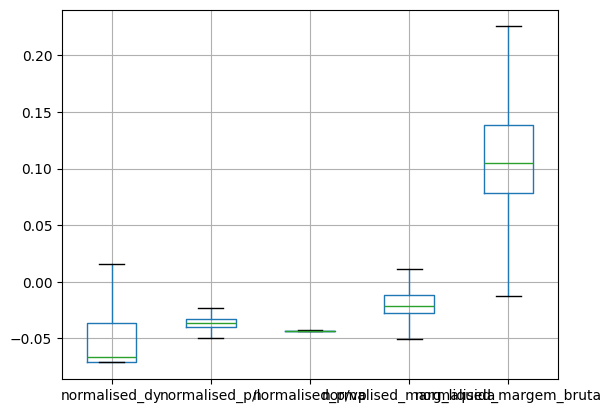

In [18]:
desired_cols = ["dy", "p/l", "p/vp", "marg_liquida", "margem_bruta"]
modified_cols = []

for col in desired_cols:
    new_col = "normalised_" + col
    modified_cols.append(new_col)
    
    col_vals = br_stocks[col]
    # print(col_vals, col_vals.mean(), col_vals.std())
    br_stocks[new_col] = ( col_vals - col_vals.mean() ) / col_vals.std()   

print(modified_cols)
# print(br_stocks)
br_stocks.boxplot(column=modified_cols, showfliers=False)